# Red Blood Cells

In [1]:
import cv2
import matplotlib.pyplot as plt
import copy
import numpy as np

## Load, convert to grayscale, resize

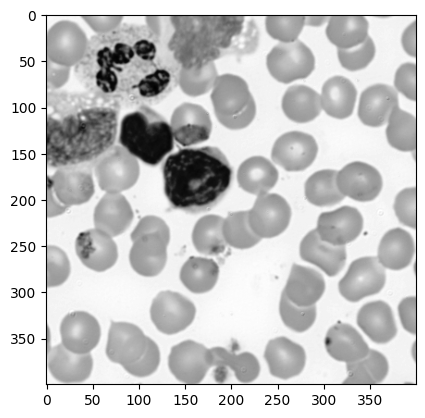

In [2]:
img = cv2.imread("blood.png")
img = cv2.resize(img, (400, 400)) # linear interpolation

orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap="gray")

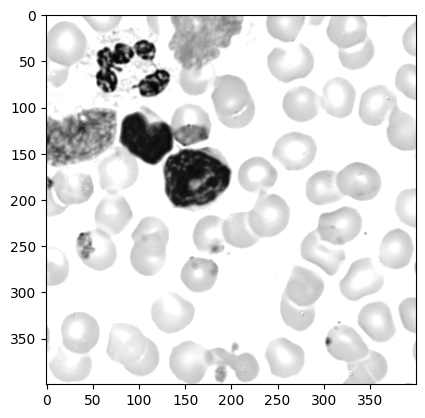

In [3]:
new_img = np.zeros(img.shape, img.dtype)
alpha = 1.2 # contrast
beta = 0 # brightness

new_img = np.clip(alpha*img + beta, 0, 255)
new_img = np.uint8(new_img)

img = new_img
plt.imshow(img, cmap="gray")

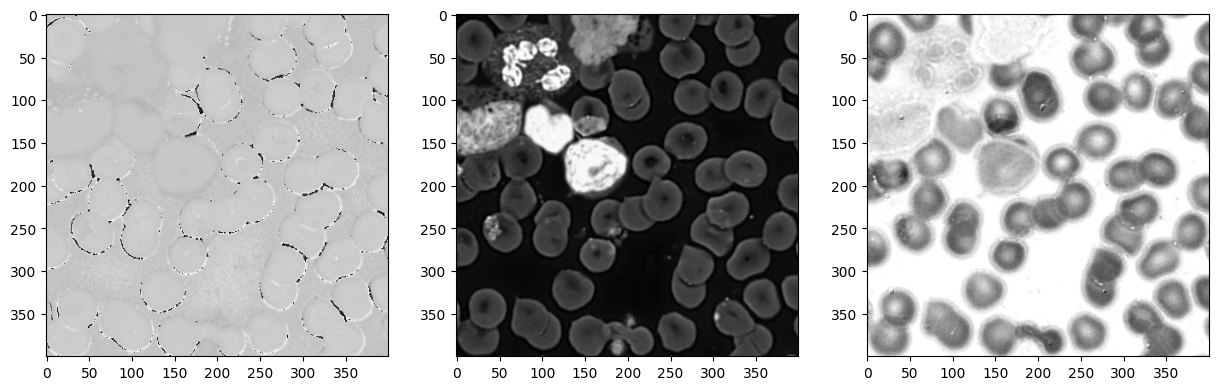

In [4]:
fig = plt.figure(figsize=(15,30))

hsv_split = cv2.split(hsv_img)

rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(hsv_split[0], cmap="gray")

fig.add_subplot(rows, columns, 2)
plt.imshow(hsv_split[1], cmap="gray")

fig.add_subplot(rows, columns, 3)
plt.imshow(hsv_split[2], cmap="gray")

plt.show()

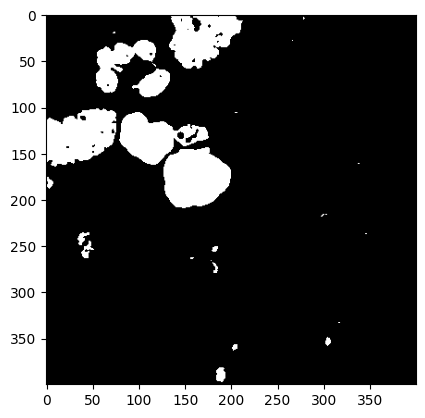

In [5]:
_, white_cells = cv2.threshold(hsv_split[1], 0, 255, cv2.THRESH_OTSU)
plt.imshow(white_cells, cmap="gray")

## Remove small blobs

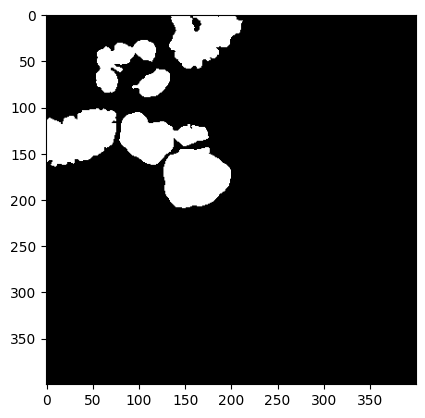

In [6]:
contours, _ = cv2.findContours(white_cells, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

areas = [cv2.contourArea(contour) for contour in contours]
thresh = np.mean(areas)
white_cells = np.zeros_like(white_cells)

for contour in contours:
    area = cv2.contourArea(contour)
    if area > thresh:
        cv2.fillPoly(white_cells, [contour], 255)

plt.imshow(white_cells, cmap="gray")

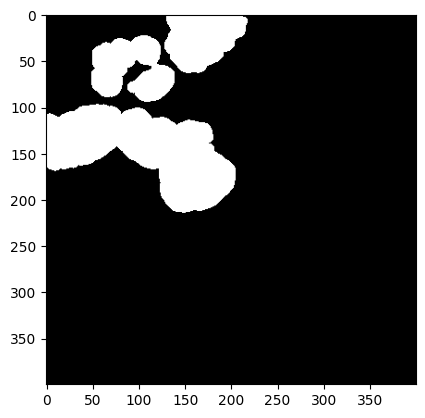

In [7]:
struct_elem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11)) 
white_cells = cv2.dilate(white_cells, struct_elem, iterations=1)
plt.imshow(white_cells, cmap="gray")

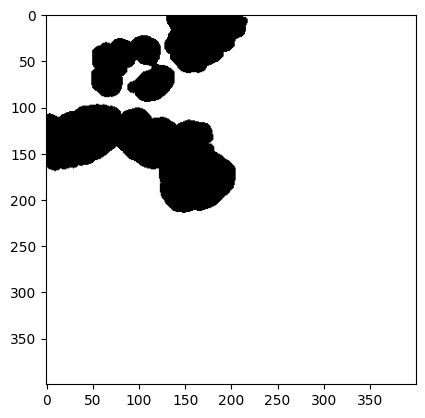

In [8]:
mask = cv2.bitwise_not(white_cells)
plt.imshow(mask, cmap="gray")

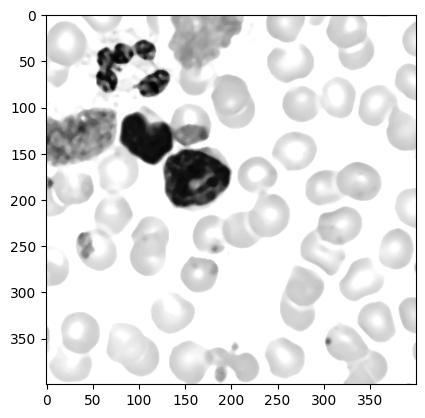

In [9]:
filtered = cv2.medianBlur(img, 5)
plt.imshow(filtered, cmap="gray")

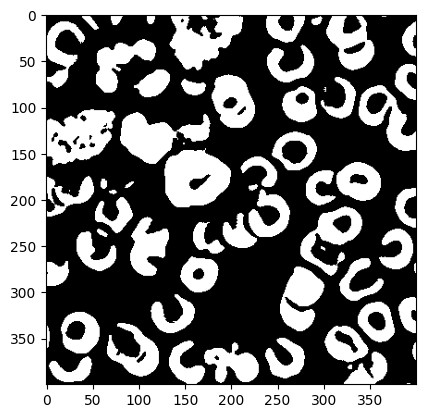

In [10]:
bin_img = cv2.adaptiveThreshold(filtered, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 61, 5)
plt.imshow(bin_img, cmap="gray")

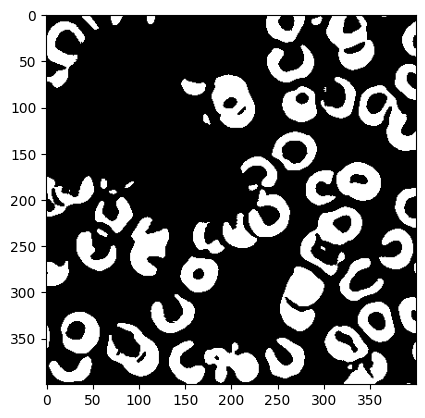

In [11]:
bin_img = cv2.bitwise_and(bin_img, mask)
plt.imshow(bin_img, cmap="gray")

In [12]:
contours, _ = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

areas = [cv2.contourArea(contour) for contour in contours]
thresh = np.mean(areas) - np.std(areas)
bin_img = np.zeros_like(white_cells)

for contour in contours:
    area = cv2.contourArea(contour)
    if area > thresh:
        cv2.fillPoly(bin_img, [contour], 255)

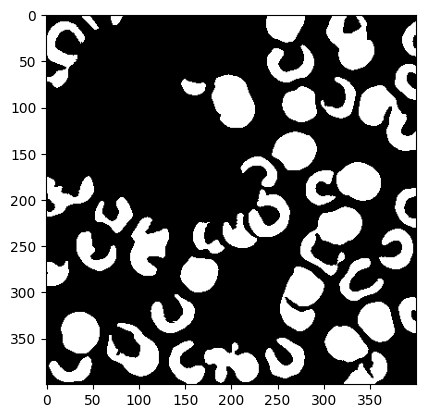

In [13]:
plt.imshow(bin_img, cmap="gray")

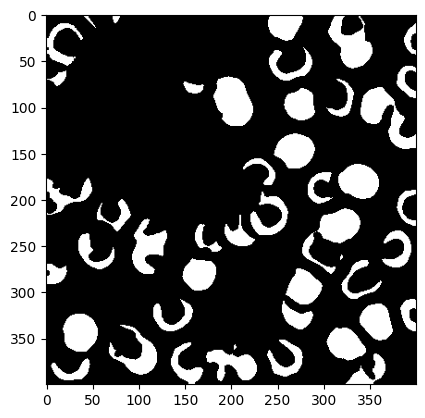

In [14]:
struct_elem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)) 
bin_img = cv2.erode(bin_img, struct_elem, iterations=1)
plt.imshow(bin_img, cmap="gray")

In [15]:
contours, _ = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Number of cells {len(contours)}")

Number of cells 48


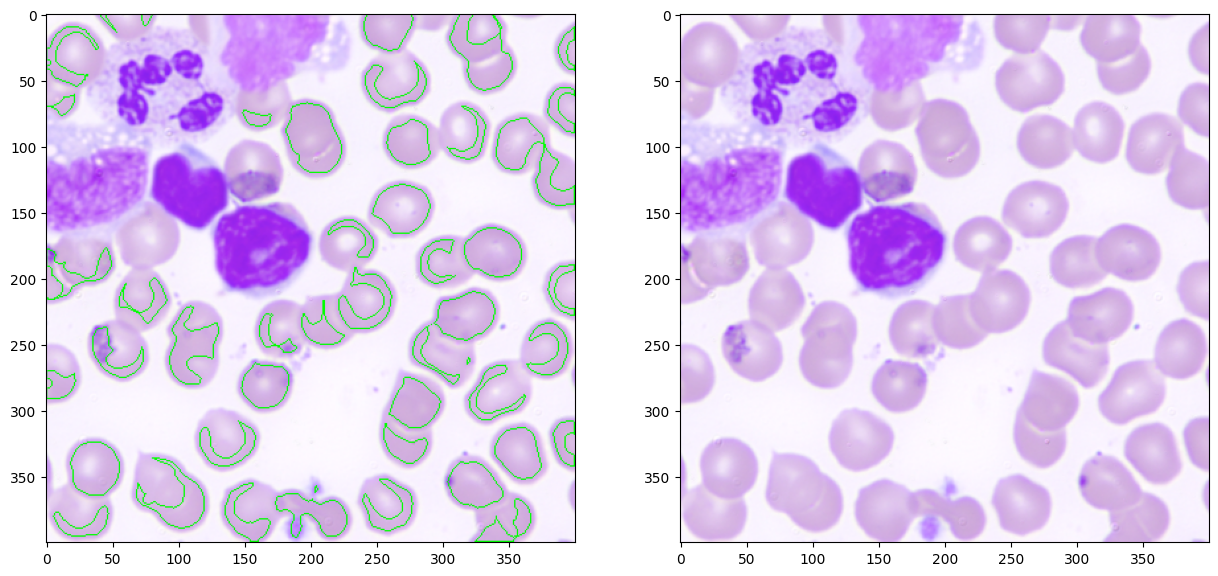

In [16]:
img_no_contours = copy.deepcopy(orig_img)
img_contours = cv2.drawContours(orig_img, contours, -1, (0, 255, 0))

fig = plt.figure(figsize=(15,30))

rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(img_contours)

fig.add_subplot(rows, columns, 2)
plt.imshow(img_no_contours)

plt.show()